In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
from model.FittingTree import *
from model.MET import *
from model.MET_Meta import *
from model.pgm import *
from model.RadixSpline import *
import random

### Learned Slopes

In [3]:
# Real World Data
# 'd' for double, 'l' for uint
datafile = open('./data/lognormal.double','rb')
data = datafile.read(8)
data_len, = struct.unpack('d', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('d',data_bin)
    data.append(data_unix)

100%|██████████| 18500001/18500001 [00:13<00:00, 1379020.24it/s]


In [4]:
epsilon = 600
FT_Index = FT(epsilon)
FT_Index.learn_index(data)
RS_Index = RadixSpline(epsilon)
RS_Index.learn_index(data)
PGM_Index = PGM(epsilon)
PGM_Index.learn_index(data)

  0%|          | 39946/18500001 [00:00<00:46, 399458.48it/s]

50 136.1518713431421


  0%|          | 4736/18500001 [00:00<06:30, 47349.09it/s]

600 50 253.31937382057438


100%|██████████| 18500001/18500001 [03:04<00:00, 100315.23it/s]


600 37 279.5589239157338


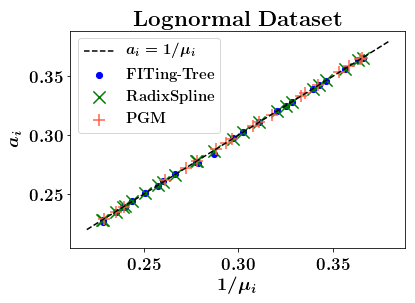

In [26]:
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 15
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']

markers = ["v", "^", "o", "<", "<", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]
plt.title('$\mathrm{Lognormal~Dataset}$')
plt.xlabel('$1/\mu_i$')
plt.ylabel('$a_i$')
sample_gap = 2
sel = 5
FT_x = 1/np.array(FT_Index.seg_mu)[np.array(FT_Index.seg_mu)<sel][::sample_gap]
FT_y = np.array(FT_Index.segments)[:,2][np.array(FT_Index.seg_mu)<sel][::sample_gap]
RS_x = 1/np.array(RS_Index.seg_mu)[np.array(RS_Index.seg_mu)<sel][::sample_gap]
RS_y = np.array(RS_Index.segments)[:,2][np.array(RS_Index.seg_mu)<sel][::sample_gap]
PGM_x = 1/np.array(PGM_Index.seg_mu)[np.array(PGM_Index.seg_mu)<sel][::sample_gap]
PGM_y = np.array(PGM_Index.segments)[:,2][np.array(PGM_Index.seg_mu)<sel][::sample_gap]
plt.scatter(FT_x,FT_y,label='$\mathrm{FITing\mbox{-}Tree}$',c='b',marker='.',s=150)
plt.scatter(RS_x,RS_y,label='$\mathrm{RadixSpline}$',c='g',marker='x',s=150)
plt.scatter(PGM_x,PGM_y,label='$\mathrm{PGM}$',c='tomato',marker='+',s=150)
x = np.arange(0.22,0.39,0.01)
plt.plot(x,x,c='black',label='$a_i=1/\mu_i$',linestyle='--')
plt.legend()
#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#plt.savefig("{}.pdf".format("results/Theorem/Lognormal_link_30"), bbox_inches='tight', pad_inches=0)

### Correctness of our bounds

In [28]:
#iid data
gaps = np.random.lognormal(1,sigma=1,size = 10000000)
#for gamma, k is the shape and \theta is the scale
#gaps = np.random.gamma(shape=1,scale=1,size=10000000)
#gaps = np.random.gamma(shape=3,scale=6,size=10000000)
#gaps = np.random.gamma(shape=2,scale=3,size=10000000)
#gaps = np.random.uniform(low=0,high=1,size=10000000)
#gaps = np.random.uniform(low=0,high=10,size=10000000)
#gaps = np.random.uniform(low=10,high=100,size=10000000)
data = [0]
for i in tqdm(range(len(gaps))):
    data.append(data[i]+gaps[i])
data = np.array(data)
assert min(gaps) > 0
data_feature = gaps.mean()/gaps.std()

100%|██████████| 10000000/10000000 [00:05<00:00, 1750377.90it/s]


In [29]:
epsilon_list = list(range(25,400,25))
MET_Index_seg_num = []
MET_Index_mae = []
MET_Index_mean_seg_err = []
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    MET_Index = MET(epsilon)
    MET_Index.learn_index(data)
    MET_Index_seg_num.append(MET_Index.seg_num)
    MET_Index_mae.append(MET_Index.mae)
    MET_Index_mean_seg_err.append(np.mean(MET_Index.seg_err))

  0%|          | 41053/10000001 [00:00<00:24, 410529.41it/s]

24049 8.194077380592262


  0%|          | 41277/10000001 [00:00<00:24, 412765.47it/s]

6547 16.610355238964477


  0%|          | 41284/10000001 [00:00<00:24, 412835.47it/s]

2972 25.20286187971381


  0%|          | 41430/10000001 [00:00<00:24, 414298.42it/s]

1689 33.75878142412186


  0%|          | 41479/10000001 [00:00<00:24, 414782.48it/s]

1094 42.10469148953085


  0%|          | 41604/10000001 [00:00<00:23, 416032.46it/s]

745 50.53634774636522


  0%|          | 42349/10000001 [00:00<00:23, 423486.37it/s]

537 58.56906724309327


  0%|          | 40218/10000001 [00:00<00:24, 402175.59it/s]

422 64.26376027362397


  0%|          | 38791/10000001 [00:00<00:25, 387905.75it/s]

377 75.83156161684384


  0%|          | 41170/10000001 [00:00<00:24, 411691.56it/s]

271 84.45627565437243


  0%|          | 34223/10000001 [00:00<00:29, 342229.51it/s]

226 90.40273355972664


  0%|          | 41037/10000001 [00:00<00:24, 410366.48it/s]

198 102.3102568689743


  0%|          | 42186/10000001 [00:00<00:23, 421851.35it/s]

176 108.63160073683993


  0%|          | 40238/10000001 [00:00<00:24, 402375.59it/s]

150 119.65741473425852


100%|██████████| 10000001/10000001 [00:22<00:00, 452039.13it/s]

128 127.25406277459372


In [30]:
FT_Index_seg_num = []
FT_Index_mae = []
FT_Index_mean_seg_err = []
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    FT_Index = FT(epsilon)
    FT_Index.learn_index(data)
    FT_Index_seg_num.append(FT_Index.seg_num)
    FT_Index_mae.append(FT_Index.mae)
    FT_Index_mean_seg_err.append(np.mean(FT_Index.seg_err))

  0%|          | 36004/10000001 [00:00<00:27, 359677.60it/s]

20655 6.1076274892372515


  0%|          | 35917/10000001 [00:00<00:27, 359169.49it/s]

5728 12.071947992805201


  0%|          | 35299/10000001 [00:00<00:28, 352985.29it/s]

2631 17.844221715577827


  0%|          | 37041/10000001 [00:00<00:26, 370404.17it/s]

1526 23.77066352293365


  0%|          | 37598/10000001 [00:00<00:27, 364442.25it/s]

957 29.419158558084145


  0%|          | 23515/10000001 [00:00<00:42, 235142.38it/s]

672 35.243819175618086


  0%|          | 23634/10000001 [00:00<00:42, 236339.10it/s]

492 41.318383468161656


  0%|          | 37572/10000001 [00:00<00:26, 375716.78it/s]

376 47.290719370928066


  0%|          | 23834/10000001 [00:00<00:41, 238339.09it/s]

310 54.00700039929996


  0%|          | 36645/10000001 [00:00<00:27, 366444.23it/s]

250 60.211318378868164


  0%|          | 44005/10000001 [00:00<00:22, 440047.27it/s]

208 64.54898254510175


  0%|          | 44397/10000001 [00:00<00:22, 443963.01it/s]

173 69.63125213687479


  0%|          | 44499/10000001 [00:00<00:22, 444986.18it/s]

147 76.3281760671824


  0%|          | 43985/10000001 [00:00<00:22, 439848.32it/s]

128 80.07166169283383


100%|██████████| 10000001/10000001 [00:25<00:00, 387280.19it/s]

109 87.10040718995928


In [31]:
RS_Index_seg_num = []
RS_Index_mae = []
RS_Index_mean_seg_err = []
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    RS_Index = RadixSpline(epsilon)
    RS_Index.learn_index(data)
    RS_Index_seg_num.append(RS_Index.seg_num)
    RS_Index_mae.append(RS_Index.mae)
    RS_Index_mean_seg_err.append(np.mean(RS_Index.seg_err))

  0%|          | 11096/10000001 [00:00<01:30, 110952.43it/s]

25 21785 9.335190966480903


  0%|          | 10896/10000001 [00:00<01:31, 108955.17it/s]

50 5845 19.174578482542152


  0%|          | 11190/10000001 [00:00<01:31, 109396.48it/s]

75 2674 28.695382030461797


  0%|          | 22219/10000001 [00:00<00:44, 222185.44it/s]

100 1534 38.475204552479546


  0%|          | 21617/10000001 [00:00<00:46, 216168.14it/s]

125 975 47.891592010840796


  0%|          | 23426/10000001 [00:00<00:42, 234257.99it/s]

150 676 58.12483328751667


  0%|          | 12820/10000001 [00:00<01:17, 128196.45it/s]

175 495 67.7497989250201


  0%|          | 24259/10000001 [00:00<00:41, 242582.13it/s]

200 377 78.809439919056


  0%|          | 24029/10000001 [00:00<00:41, 240286.79it/s]

225 305 89.9585620041438


  0%|          | 13988/10000001 [00:00<01:11, 139879.47it/s]

250 255 100.25211857478814


  0%|          | 12931/10000001 [00:00<01:17, 129303.65it/s]

275 208 105.25324887467511


  0%|          | 12987/10000001 [00:00<01:16, 129864.86it/s]

300 172 116.00490749950924


  0%|          | 23928/10000001 [00:00<00:41, 239271.10it/s]

325 148 127.18582978141703


  0%|          | 24053/10000001 [00:00<00:41, 240525.07it/s]

350 131 136.11834938816506


100%|██████████| 10000001/10000001 [00:46<00:00, 217011.53it/s]

375 109 146.0831209916879


In [32]:
PGM_Index_seg_num = []
PGM_Index_mae = []
PGM_Index_mean_seg_err = []
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    PGM_Index = PGM(epsilon)
    PGM_Index.learn_index(data)
    PGM_Index_seg_num.append(PGM_Index.seg_num)
    PGM_Index_mae.append(PGM_Index.mae)
    PGM_Index_mean_seg_err.append(np.mean(PGM_Index.seg_err))

  0%|          | 5138/10000001 [00:00<03:14, 51377.48it/s]

25 6047 11.697007130299287


  0%|          | 9215/10000001 [00:00<01:48, 92134.27it/s]

50 1558 23.361003163899685


  0%|          | 4583/10000001 [00:00<03:38, 45818.57it/s]

75 684 35.04261729573827


  0%|          | 8738/10000001 [00:00<01:54, 87374.67it/s]

100 381 47.04469839553016


  0%|          | 4108/10000001 [00:00<04:03, 41078.57it/s]

125 254 59.895746310425366


  0%|          | 7784/10000001 [00:00<02:08, 77827.64it/s]

150 175 69.28639627136037


  0%|          | 7771/10000001 [00:00<02:08, 77708.59it/s]

175 130 79.73628762637124


  0%|          | 6342/10000001 [00:00<02:37, 63415.52it/s]

200 101 94.85781461421854


  0%|          | 7301/10000001 [00:00<02:16, 73007.81it/s]

225 81 103.04002049599795


  0%|          | 6982/10000001 [00:00<02:23, 69818.90it/s]

250 64 112.94762480523752


  0%|          | 623/10000001 [00:00<30:12, 5517.32it/s]

275 53 127.04306719569328


  0%|          | 6575/10000001 [00:00<02:32, 65737.52it/s]

300 47 144.9544142045586


  0%|          | 6348/10000001 [00:00<02:37, 63472.19it/s]

325 41 160.58467134153287


  0%|          | 6193/10000001 [00:00<02:41, 61926.66it/s]

350 37 167.95920120407987


100%|██████████| 10000001/10000001 [01:41<00:00, 98749.90it/s]


375 27 179.69674253032574


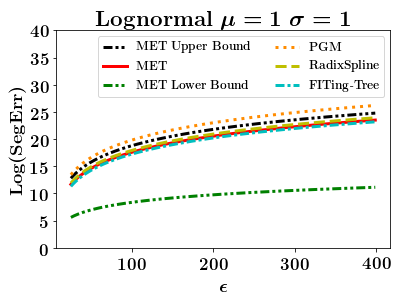

In [34]:
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 12
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]
x = np.arange(25,400)
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,epsilon_list,MET_Index_mean_seg_err)
p2,_ = curve_fit(func,epsilon_list,FT_Index_mean_seg_err)
p3,_ = curve_fit(func,epsilon_list,RS_Index_mean_seg_err)
p4,_ = curve_fit(func,epsilon_list,PGM_Index_mean_seg_err)
plt.title(r'$\mathrm{Lognormal}~\mu=1~\sigma=1$')
plt.xlabel('$\epsilon$')
plt.ylabel('$\mathrm{Log(SegErr)}$')
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),  (0, (5, 10))]
plt.plot(x,np.log2(0.78 * data_feature**2 * x**3),label='$\mathrm{MET~Upper~Bound}$',linestyle=(0, (3, 1, 1, 1, 1, 1)),color='black',linewidth=3)
plt.plot(x,np.log2(p1[0] * x**p1[1]),label='$\mathrm{MET}$',linestyle='solid',color=colors[1],linewidth=3)
plt.plot(x,np.log(0.564 * data_feature**1 * x**2),label='$\mathrm{MET~Lower~Bound}$',linestyle=(0, (3, 1, 1, 1, 1, 1)),color='g',linewidth=3)

plt.plot(x,np.log2(p4[0] * x**p4[1]),label='$\mathrm{PGM}$',linestyle='dotted',color='darkorange',linewidth=3)
plt.plot(x,np.log2(p3[0] * x**p3[1]),label='$\mathrm{RadixSpline}$',linestyle='--',color='y',linewidth=3)
plt.plot(x,np.log2(p2[0] * x**p2[1]),label='$\mathrm{FITing\mbox{-}Tree}$',linestyle=(0, (3, 1, 1, 1)),color='c',linewidth=3)
plt.legend(ncol=2,)
plt.yticks(np.arange(0,41,5))
#plt.savefig("{}.pdf".format("results/Theorem/Lognormal_1_1_28"), bbox_inches='tight', pad_inches=0)